In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
course_df = pd.read_csv('../data/course.csv')
ratings_df = pd.read_csv('../data/ratings.csv')


In [3]:
course_df.head(3)

,Unnamed: 0,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# WordCloud

In [5]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="green", 
                      width=800, 
                      height=400)
w = wordcloud.generate(titles)


In [6]:
w

In [6]:
import streamlit as st 
import streamlit_wordcloud as wordcloud
words = [
    dict(text="Robinhood", value=16000, color="#b5de2b", country="US", industry="Cryptocurrency"),
    dict(text="Personio", value=8500, color="#b5de2b", country="DE", industry="Human Resources"),
    dict(text="Boohoo", value=6700, color="#b5de2b", country="UK", industry="Beauty"),
    dict(text="Deliveroo", value=13400, color="#b5de2b", country="UK", industry="Delivery"),
    dict(text="SumUp", value=8300, color="#b5de2b", country="UK", industry="Credit Cards"),
    dict(text="CureVac", value=12400, color="#b5de2b", country="DE", industry="BioPharma"),
    dict(text="Deezer", value=10300, color="#b5de2b", country="FR", industry="Music Streaming"),
    dict(text="Eurazeo", value=31, color="#b5de2b", country="FR", industry="Asset Management"),
    dict(text="Drift", value=6000, color="#b5de2b", country="US", industry="Marketing Automation"),
    dict(text="Twitch", value=4500, color="#b5de2b", country="US", industry="Social Media"),
    dict(text="Plaid", value=5600, color="#b5de2b", country="US", industry="FinTech"),
]
return_obj = wordcloud.visualize(words, tooltip_data_fields={
    'text':'Company', 'value':'Mentions', 'country':'Country of Origin', 'industry':'Industry'
}, per_word_coloring=False)

ModuleNotFoundError: No module named 'streamlit'

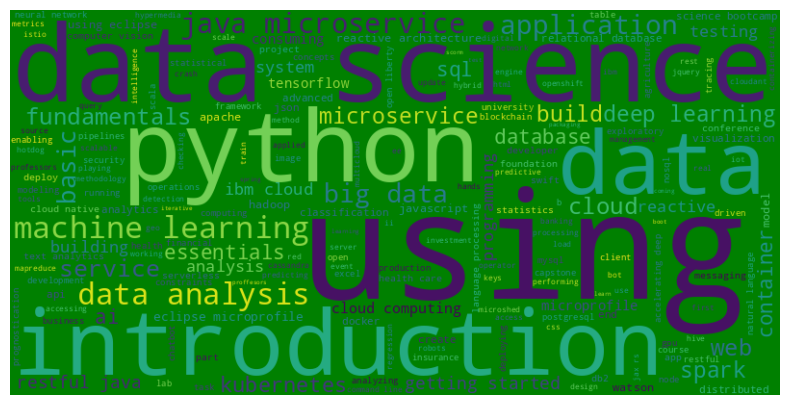

In [9]:
# Disable axis display
# Create a new figure with a specified size
plt.figure(figsize=(10,5))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.axis('off')
plt.savefig('../data/wordcloud.png',bbox_inches='tight', pad_inches=0)
plt.show()

# Analyze Course Genres

In [11]:
import plotly.express as px 
dummy = course_df[course_df.columns[3:]].sum(axis=0).sort_values(ascending=False)
dummy = pd.DataFrame({'gender': dummy.index, 'count':dummy.values})
fig = px.bar(dummy, x='gender', y='count')
fig.show()

# Analyze Course Enrollments

In [41]:
dummy = ratings_df.groupby(by='user').size().to_frame(name='enrolls').reset_index()
px.histogram(
            dummy,
            x='enrolls',
            marginal="box",
            #nbins=int((dummy.max()-dummy.min())/int(np.log2(dummy.shape[0]+1)))
            )

In [19]:
ratings_df.rating.value_counts()

rating
4    77936
3    77866
5    77504
Name: count, dtype: int64

# Find the Top-20 Most Popular Courses

In [62]:
dummy = ratings_df.groupby(by=['item']).agg({'item':'size', 'rating':'mean'}).rename(columns={'item':'size'}).reset_index()
dummy = dummy.rename(columns={'item':'COURSE_ID'})
dummy = pd.merge(
                left = dummy,
                right = course_df[['COURSE_ID','TITLE']],
                on = 'COURSE_ID', 
                how='left'
                )

In [81]:
dummy

,COURSE_ID,size,rating,TITLE
0,AI0111EN,383,3.890339,game playing ai with swift for tensorflow s4tf
1,BC0101EN,6719,3.998661,blockchain essentials
2,BC0201EN,2866,4.004187,ibm blockchain foundation developer
3,BC0202EN,775,3.997419,build an iot blockchain network for a supply c...
4,BD0101EN,13291,3.997141,big data 101
...,...,...,...,...
121,TMP0105EN,347,3.951009,getting started with the data apache spark ma...
122,TMP0106,35,4.028571,tmp data science bootcamp
123,TMP107,2,4.000000,data science bootcamp with python
124,WA0101EN,2247,3.988874,watson analytics 101


In [88]:
dummy2 = dummy.sort_values(by='size').head(10)
fig = px.bar(dummy2, x='TITLE', y='size',text_auto='.2s')

fig.show()